<a href="https://colab.research.google.com/github/Sattwikroy21/Loan-Approval/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [79]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data Collection and Processing

In [80]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/LoanApprovalPrediction.csv')

In [81]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [82]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
# number of rows and columns
loan_dataset.shape

(598, 13)

In [84]:
# statistical measures
loan_dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,586.000000,598.000000,598.000000,577.000000,584.000000,549.000000
mean,0.755973,5292.252508,1631.499866,144.968804,341.917808,0.843352
std,1.007751,5807.265364,2953.315785,82.704182,65.205994,0.363800
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3806.000000,1211.500000,127.000000,360.000000,1.000000
75%,1.750000,5746.000000,2324.000000,167.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,650.000000,480.000000,1.000000


In [85]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [87]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [88]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [89]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [90]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0.0    289
2.0     90
1.0     84
3.0     42
Name: count, dtype: int64

In [91]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [92]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0.0    289
2.0     90
1.0     84
3.0     42
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

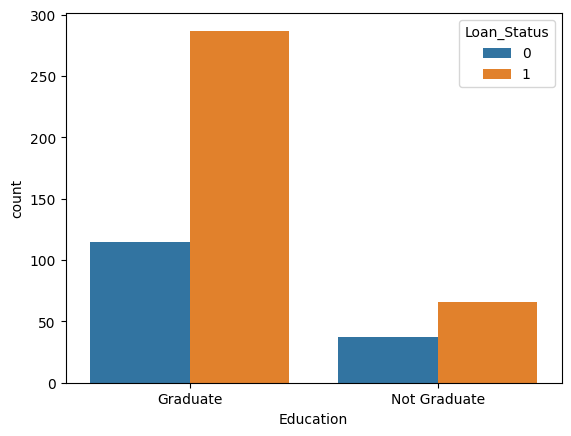

In [93]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

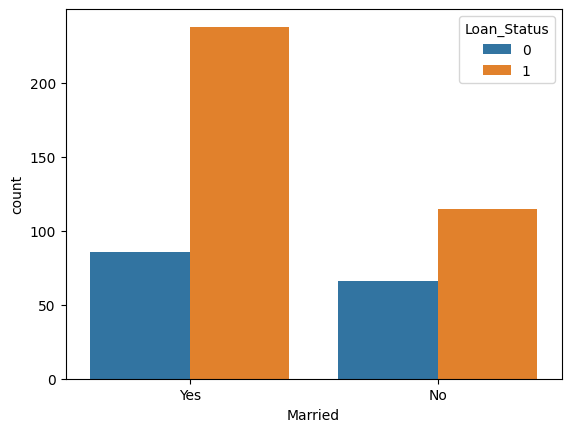

In [94]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [95]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [96]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2.0,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [97]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [98]:
print(X)
print(Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1         1.0          1              0             4583   
2         1        1         0.0          1              1             3000   
3         1        1         0.0          0              0             2583   
4         1        0         0.0          1              0             6000   
5         1        1         2.0          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
593       0        0         0.0          1              0             2900   
594       1        1         3.0          1              0             4106   
595       1        1         1.0          1              0             8072   
596       1        1         2.0          1              0             7583   
597       0        0         0.0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

Train Test Split

In [99]:
scaler = StandardScaler()
scaler.fit(X)
standerdized_data = scaler.transform(X)
print(standerdized_data)

[[ 0.47510857  0.74742356  0.22423929 ...  0.27963907  0.40446813
  -1.30479849]
 [ 0.47510857  0.74742356 -0.76046368 ...  0.27963907  0.40446813
   1.2691204 ]
 [ 0.47510857  0.74742356 -0.76046368 ...  0.27963907  0.40446813
   1.2691204 ]
 ...
 [ 0.47510857  0.74742356  0.22423929 ...  0.27963907  0.40446813
   1.2691204 ]
 [ 0.47510857  0.74742356  1.20894226 ...  0.27963907  0.40446813
   1.2691204 ]
 [-2.10478206 -1.33792946 -0.76046368 ...  0.27963907 -2.47238267
  -0.01783904]]


In [100]:
X = standerdized_data
print(X)
print(Y)

[[ 0.47510857  0.74742356  0.22423929 ...  0.27963907  0.40446813
  -1.30479849]
 [ 0.47510857  0.74742356 -0.76046368 ...  0.27963907  0.40446813
   1.2691204 ]
 [ 0.47510857  0.74742356 -0.76046368 ...  0.27963907  0.40446813
   1.2691204 ]
 ...
 [ 0.47510857  0.74742356  0.22423929 ...  0.27963907  0.40446813
   1.2691204 ]
 [ 0.47510857  0.74742356  1.20894226 ...  0.27963907  0.40446813
   1.2691204 ]
 [-2.10478206 -1.33792946 -0.76046368 ...  0.27963907 -2.47238267
  -0.01783904]]
1      0
2      1
3      1
4      1
5      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 505, dtype: int64


In [101]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [102]:
print(X.shape, X_train.shape, X_test.shape)

(505, 11) (404, 11) (101, 11)


Training the model:

Support Vector Machine Model

In [103]:
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=42))
]

# Initialize stacking classifier with a meta-classifier (Logistic Regression in this case)
stacking_clf = StackingClassifier(estimators = base_classifiers, final_estimator = LogisticRegression())

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(n_estimators=100, criterion='log_loss', random_state=7)
svc = SVC(kernel = 'linear')
lr = LogisticRegression()
dt = DecisionTreeClassifier()
nb = GaussianNB()

# Initialize XGBoost classifier
xgb = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    eval_metric='error'            # evaluation metric
)
# Initialize GBM classifier
gbm = GradientBoostingClassifier(
    n_estimators=100,  # number of boosting stages
    learning_rate=0.1, # learning rate
    max_depth=3        # maximum depth of the individual estimators
)
# Initialize AdaBoost classifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)

# Initialize MLPClassifier (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(200,),activation = 'relu', max_iter=500, learning_rate = 'adaptive', alpha=0.0002, solver='adam')

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(svc, n_estimators=10, random_state=42)

RandomForestClassifier :-
Testing Report :-
Accuracy : 82.17821782178217
              precision    recall  f1-score   support

           0       0.80      0.53      0.64        30
           1       0.83      0.94      0.88        71

    accuracy                           0.82       101
   macro avg       0.81      0.74      0.76       101
weighted avg       0.82      0.82      0.81       101



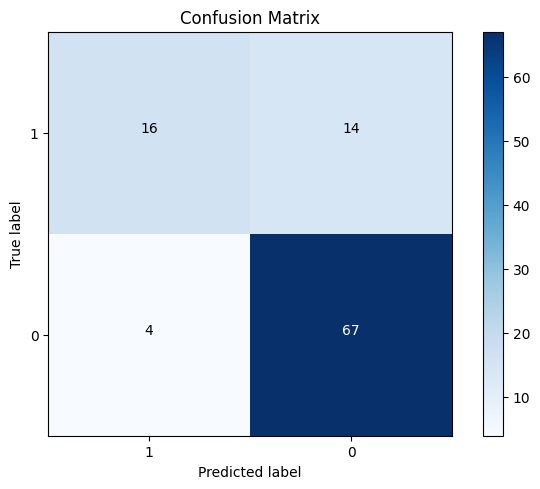

KNeighborsClassifier :-
Testing Report :-
Accuracy : 83.16831683168317
              precision    recall  f1-score   support

           0       0.84      0.53      0.65        30
           1       0.83      0.96      0.89        71

    accuracy                           0.83       101
   macro avg       0.84      0.75      0.77       101
weighted avg       0.83      0.83      0.82       101



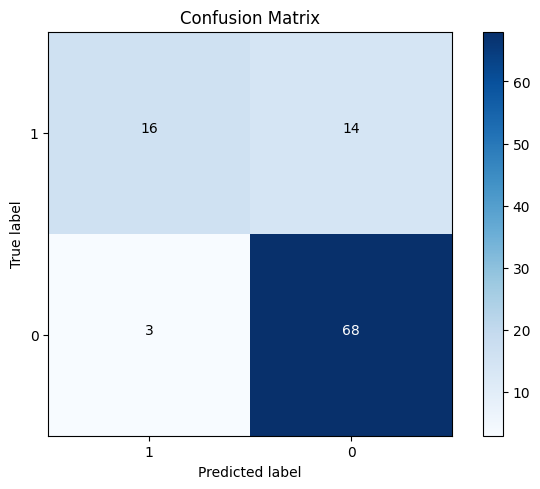

SVC :-
Testing Report :-
Accuracy : 84.15841584158416
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        30
           1       0.82      1.00      0.90        71

    accuracy                           0.84       101
   macro avg       0.91      0.73      0.77       101
weighted avg       0.87      0.84      0.82       101



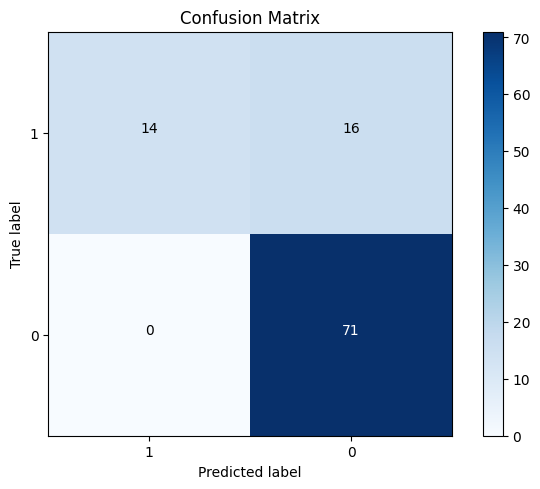

LogisticRegression :-
Testing Report :-
Accuracy : 84.15841584158416
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        30
           1       0.82      1.00      0.90        71

    accuracy                           0.84       101
   macro avg       0.91      0.73      0.77       101
weighted avg       0.87      0.84      0.82       101



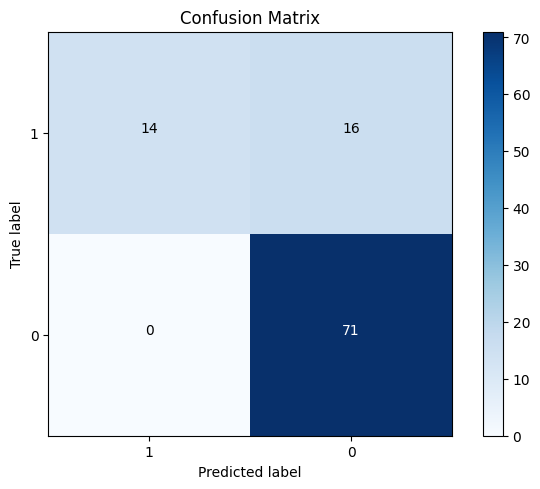

DecisionTreeClassifier :-
Testing Report :-
Accuracy : 68.31683168316832
              precision    recall  f1-score   support

           0       0.47      0.50      0.48        30
           1       0.78      0.76      0.77        71

    accuracy                           0.68       101
   macro avg       0.63      0.63      0.63       101
weighted avg       0.69      0.68      0.69       101



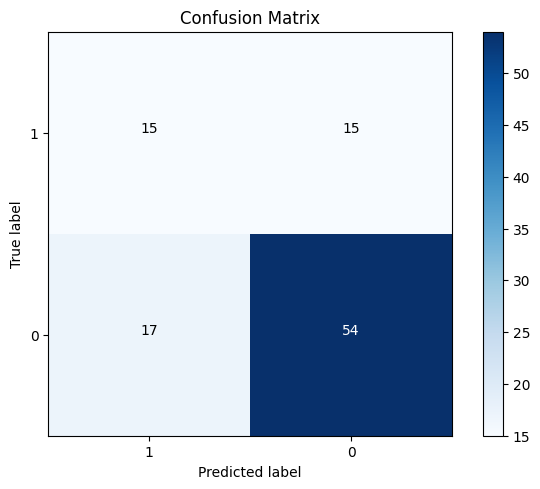

GaussianNB :-
Testing Report :-
Accuracy : 81.1881188118812
              precision    recall  f1-score   support

           0       0.82      0.47      0.60        30
           1       0.81      0.96      0.88        71

    accuracy                           0.81       101
   macro avg       0.82      0.71      0.74       101
weighted avg       0.81      0.81      0.79       101



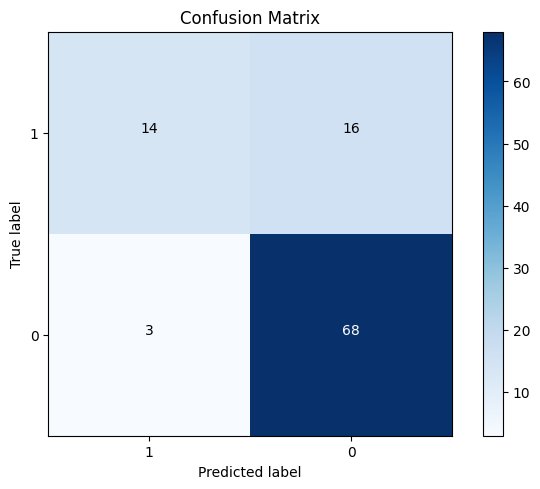

XGBClassifier :-
Testing Report :-
Accuracy : 81.1881188118812
              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.86      0.87      0.87        71

    accuracy                           0.81       101
   macro avg       0.78      0.77      0.77       101
weighted avg       0.81      0.81      0.81       101



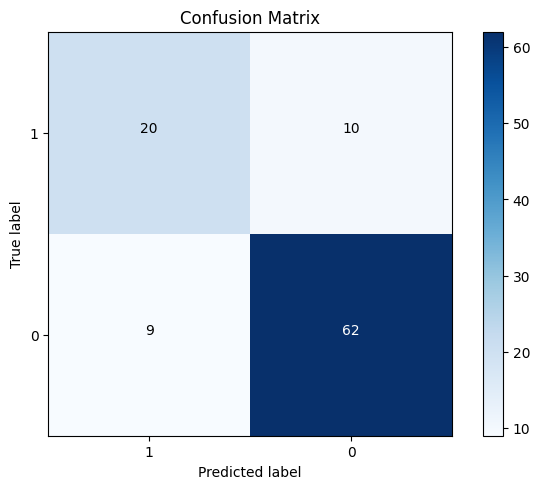

GradientBoostingClassifier :-
Testing Report :-
Accuracy : 80.19801980198021
              precision    recall  f1-score   support

           0       0.78      0.47      0.58        30
           1       0.81      0.94      0.87        71

    accuracy                           0.80       101
   macro avg       0.79      0.71      0.73       101
weighted avg       0.80      0.80      0.78       101



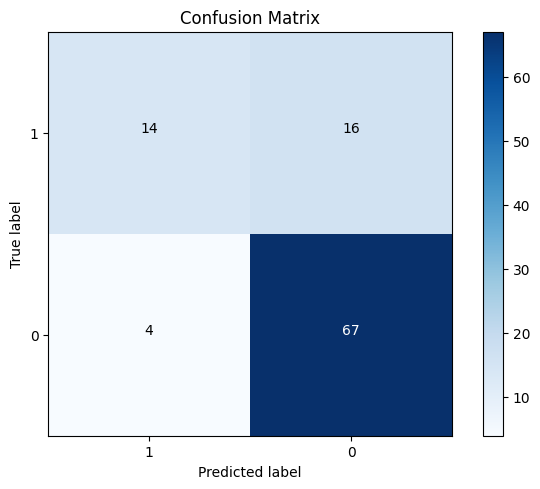

AdaBoostClassifier :-
Testing Report :-
Accuracy : 82.17821782178217
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        30
           1       0.82      0.96      0.88        71

    accuracy                           0.82       101
   macro avg       0.83      0.73      0.75       101
weighted avg       0.82      0.82      0.81       101



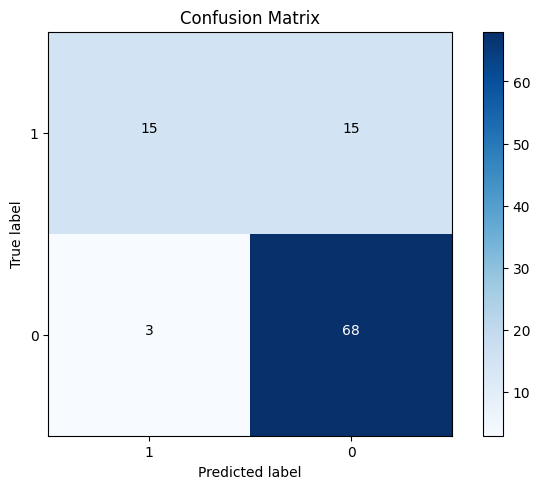

MLPClassifier :-
Testing Report :-
Accuracy : 81.1881188118812
              precision    recall  f1-score   support

           0       0.79      0.50      0.61        30
           1       0.82      0.94      0.88        71

    accuracy                           0.81       101
   macro avg       0.80      0.72      0.74       101
weighted avg       0.81      0.81      0.80       101



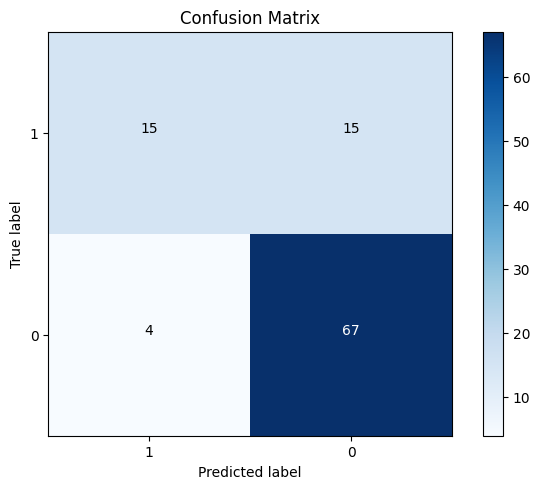

BaggingClassifier :-
Testing Report :-
Accuracy : 84.15841584158416
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        30
           1       0.82      1.00      0.90        71

    accuracy                           0.84       101
   macro avg       0.91      0.73      0.77       101
weighted avg       0.87      0.84      0.82       101



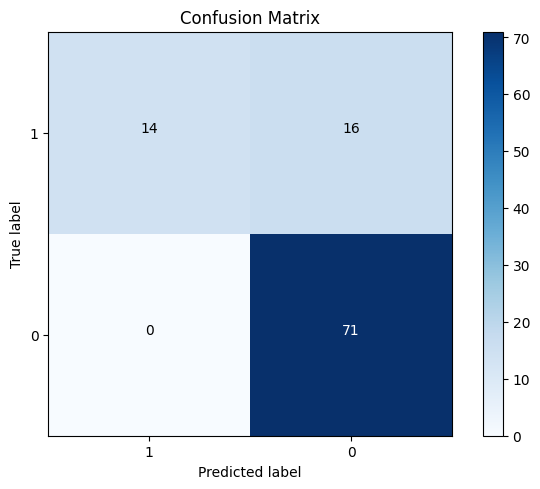

StackingClassifier :-
Testing Report :-
Accuracy : 81.1881188118812
              precision    recall  f1-score   support

           0       0.92      0.40      0.56        30
           1       0.80      0.99      0.88        71

    accuracy                           0.81       101
   macro avg       0.86      0.69      0.72       101
weighted avg       0.83      0.81      0.78       101



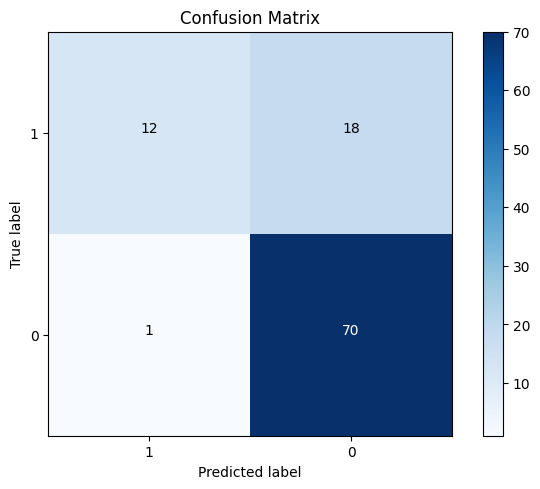

In [104]:
predict_list = []

for classifier in (rf, knn, svc, lr, dt, nb, xgb, gbm, ada, mlp, bagging_clf, stacking_clf):
  classifier.fit(X_train, Y_train)

  # Training Data
  Y_predict = classifier.predict(X_train)
  model_train_accuracy = accuracy_score(Y_train,Y_predict)
  model_train_report = classification_report(Y_train, Y_predict)

  # Testing Data
  Y_test_predict = classifier.predict(X_test)
  cm = confusion_matrix(Y_test, Y_test_predict)

  # Step 3: Plot the confusion matrix
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, [1, 0])
  plt.yticks(tick_marks, [1, 0])

  # Fill confusion matrix with values
  thresh = cm.max() / 2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  model_test_accuracy = accuracy_score(Y_test, Y_test_predict)
  model_test_report = classification_report(Y_test, Y_test_predict)

  print(classifier.__class__.__name__, ":-")
  #print("Training Report :-")
  #print("Accuracy :", 100*model_train_accuracy)
  #print(model_train_report)
  print("Testing Report :-")
  print("Accuracy :", 100*model_test_accuracy)
  print(model_test_report)
  plt.show()